### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
import time

import warnings
warnings.filterwarnings("ignore")

### Data preparation

In [2]:
data = pd.read_excel('final_data_0614.xlsx')

In [3]:
data

,url,title,title_after,catelogue,tag,n_rate,p_rate,adj_rate,m_rate,v_rate,adv_rate,len,popular_num,popular_all_num
0,https-datos-parcan-es-dataset-iniciativas_tipo...,ED Initiatives — 2015 — VIII Legislature,ED Initiatives Legislature,datos-gob-es,GOVE,0.6667,0.0,0.0000,0.0,0.3333,0.0,40,3,0
1,c5e26a34-2456-46f5-9747-563469e60e05,TAH02 - Private households persons per household,Private households persons per household,data-gov-ie,GOVE,0.6000,0.0,0.2000,0.0,0.0000,0.0,52,0,131356
2,cz-cuzk-zm10-rb-11180494,"Base map CR 1:10,000 - colour seamless - 11180494",Base map CR colour seamless,cuzk,GOVE,1.0000,0.0,0.0000,0.0,0.0000,0.0,49,0,0
3,vp20160228-administration-cantonale-geneve,Results f the votes of the 28th February 2016 ...,Results votes February Geneva,opendata-swiss,GOVE,1.0000,0.0,0.0000,0.0,0.0000,0.0,57,0,0
4,cz-cuzk-zm10-rb-11100842,"Base map CR 1:10,000 - colour seamless - 11100842",Base map CR colour seamless,cuzk,GOVE,1.0000,0.0,0.0000,0.0,0.0000,0.0,49,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69797,timetable-54-2020-hrdf-oevch,Fahrplan 2020 (HRDF) Fmat 5.40,Fahrplan HRDF Fmat,opendata-swiss,TRAN,1.0000,0.0,0.0000,0.0,0.0000,0.0,32,0,0
69798,1759d3e9-1bd3-4744-b26e-4e759340ca15,Car park Scharbeutz P2,Car park Scharbeutz,govdata,TRAN,1.0000,0.0,0.0000,0.0,0.0000,0.0,22,0,5
69799,0fb2abdf-2809-4c2f-9323-f016ccc116aa,Sentier du Littal français (métropole et outre...,Sentier du Littal français métropole et outre-mer,geocatalogue-fr,TRAN,0.5714,0.0,0.1429,0.0,0.2857,0.0,53,0,0
69800,37634a10-e4d3-4930-92c4-5338410978e0,Automatic counting station Kiel/Schönkirchen 2009,Automatic counting station Kiel/Schönkirchen,govdata,TRAN,1.0000,0.0,0.0000,0.0,0.0000,0.0,49,0,351537


In [4]:
data_used = data[['catelogue', 'tag', 'n_rate', 'p_rate', 'adj_rate', 'm_rate', 'v_rate', 
                  'adv_rate', 'len', 'popular_num', 'popular_all_num']]

In [112]:
data_used.shape

(69802, 11)

In [113]:
data_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69802 entries, 0 to 69801
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   catelogue        69802 non-null  object 
 1   tag              69802 non-null  object 
 2   n_rate           69802 non-null  float64
 3   p_rate           69802 non-null  float64
 4   adj_rate         69802 non-null  float64
 5   m_rate           69802 non-null  float64
 6   v_rate           69802 non-null  float64
 7   adv_rate         69802 non-null  float64
 8   len              69802 non-null  int64  
 9   popular_num      69802 non-null  int64  
 10  popular_all_num  69802 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 5.9+ MB


In [114]:
data_used.describe()

,n_rate,p_rate,adj_rate,m_rate,v_rate,adv_rate,len,popular_num,popular_all_num
count,69802.000000,69802.000000,69802.000000,69802.000000,69802.000000,69802.000000,69802.000000,6.980200e+04,6.980200e+04
mean,0.891375,0.000389,0.049404,0.001224,0.040323,0.002494,54.287857,1.108469e+04,2.322634e+04
std,0.161037,0.009103,0.105762,0.018127,0.090841,0.025350,32.251617,3.114683e+05,6.611516e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000e+00
25%,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000e+00,0.000000e+00
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,0.000000e+00,0.000000e+00
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,0.000000e+00,0.000000e+00
max,1.000000,0.400000,1.000000,0.500000,1.000000,1.000000,447.000000,3.072825e+07,7.247886e+07


### Numerical variables

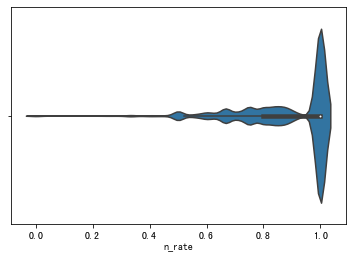

In [21]:
sns.violinplot(data_used['n_rate'])

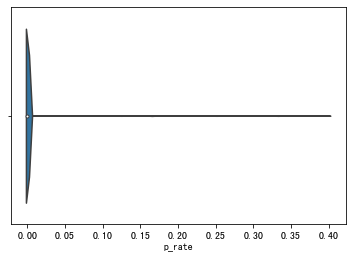

In [22]:
sns.violinplot(data_used['p_rate'])

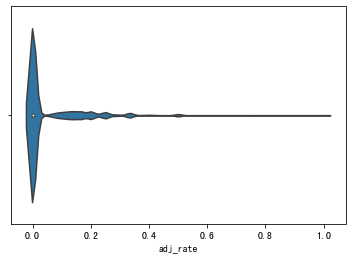

In [23]:
sns.violinplot(data_used['adj_rate'])

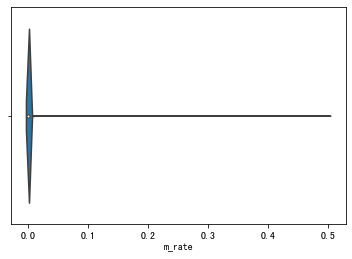

In [24]:
sns.violinplot(data_used['m_rate'])

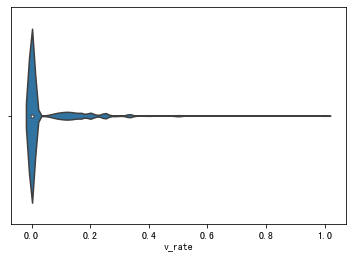

In [25]:
sns.violinplot(data_used['v_rate'])

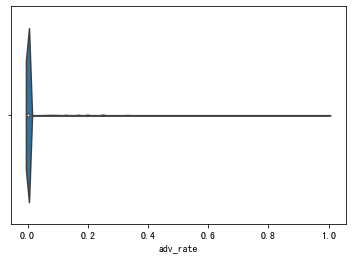

In [26]:
sns.violinplot(data_used['adv_rate'])

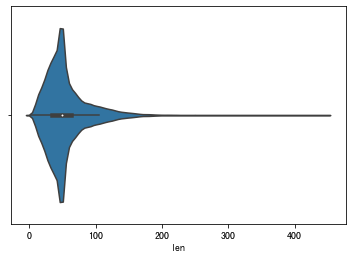

In [27]:
sns.violinplot(data_used['len'])

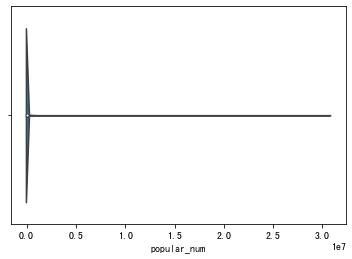

In [37]:
sns.violinplot(data_used['popular_num'])

In [5]:
# transform to keyword popular score in recent 7 days
# min-max
min_num = data_used['popular_num'].min()
max_num = data_used['popular_num'].max()
data_used['keyword_7days_popular_score'] = 100 * (data_used['popular_num'] - min_num) / (max_num - min_num)

### Categorical variables

In [6]:
data_used['catelogue'].value_counts()/len(data_used)

gdi-de             0.348787
govdata            0.184465
cuzk               0.109710
datos-gob-es       0.104438
geocatalogue-fr    0.058981
                     ...   
erc                0.000014
eda                0.000014
c                  0.000014
budg               0.000014
mare               0.000014
Name: catelogue, Length: 95, dtype: float64

In [7]:
for i in range(len(data_used)):
    if data_used.loc[i, 'catelogue'] == 'gdi-de':
        data_used.loc[i, 'cate_tag'] = 0
    elif data_used.loc[i, 'catelogue'] == 'govdata':
        data_used.loc[i, 'cate_tag'] = 1
    elif data_used.loc[i, 'catelogue'] == 'cuzk':
        data_used.loc[i, 'cate_tag'] = 2
    elif data_used.loc[i, 'catelogue'] == 'datos-gob-es':
        data_used.loc[i, 'cate_tag'] = 3
    elif data_used.loc[i, 'catelogue'] == 'geocatalogue-fr':
        data_used.loc[i, 'cate_tag'] = 4
    else:
        data_used.loc[i, 'cate_tag'] = 5

In [8]:
data_used['cate_tag'].value_counts()/len(data_used)

0.0    0.348787
5.0    0.193619
1.0    0.184465
2.0    0.109710
3.0    0.104438
4.0    0.058981
Name: cate_tag, dtype: float64

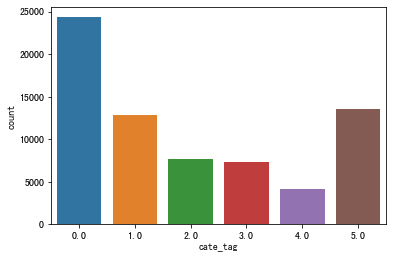

In [119]:
sns.countplot(data_used['cate_tag'])

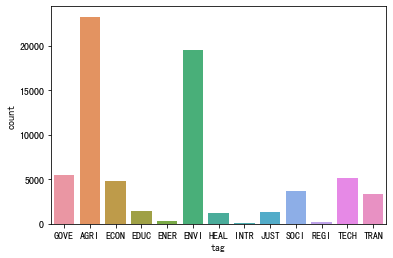

In [120]:
sns.countplot(data_used['tag'])

### Y 

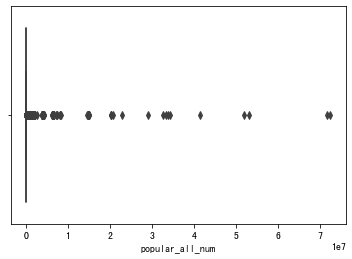

In [45]:
sns.boxplot(data_used['popular_all_num'])

In [9]:
# transform to popular score in history
# min-max
min_all_num = data_used['popular_all_num'].min()
max_all_num = data_used['popular_all_num'].max()
data_used['history_popular_score'] = 100 * (data_used['popular_all_num'] - min_all_num) / (max_all_num - min_all_num)

In [10]:
# divided into two categories
# not popular at all: history_popular_score==0  52980
# popular: history_popular_score!=0  16822
data_used.loc[data_used['history_popular_score']!=0, 'y_tag'] = 1
data_used.loc[data_used['history_popular_score']==0, 'y_tag'] = 0

In [11]:
data_used

,catelogue,tag,n_rate,p_rate,adj_rate,m_rate,v_rate,adv_rate,len,popular_num,popular_all_num,keyword_7days_popular_score,cate_tag,history_popular_score,y_tag
0,datos-gob-es,GOVE,0.6667,0.0,0.0000,0.0,0.3333,0.0,40,3,0,0.000010,3.0,0.000000,0.0
1,data-gov-ie,GOVE,0.6000,0.0,0.2000,0.0,0.0000,0.0,52,0,131356,0.000000,5.0,0.181234,1.0
2,cuzk,GOVE,1.0000,0.0,0.0000,0.0,0.0000,0.0,49,0,0,0.000000,2.0,0.000000,0.0
3,opendata-swiss,GOVE,1.0000,0.0,0.0000,0.0,0.0000,0.0,57,0,0,0.000000,5.0,0.000000,0.0
4,cuzk,GOVE,1.0000,0.0,0.0000,0.0,0.0000,0.0,49,0,0,0.000000,2.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69797,opendata-swiss,TRAN,1.0000,0.0,0.0000,0.0,0.0000,0.0,32,0,0,0.000000,5.0,0.000000,0.0
69798,govdata,TRAN,1.0000,0.0,0.0000,0.0,0.0000,0.0,22,0,5,0.000000,1.0,0.000007,1.0
69799,geocatalogue-fr,TRAN,0.5714,0.0,0.1429,0.0,0.2857,0.0,53,0,0,0.000000,4.0,0.000000,0.0
69800,govdata,TRAN,1.0000,0.0,0.0000,0.0,0.0000,0.0,49,0,351537,0.000000,1.0,0.485020,1.0


In [12]:
data_numeric = data_used[['n_rate', 'p_rate', 'adj_rate', 'm_rate', 'v_rate', 'adv_rate', 
                          'len', 'keyword_7days_popular_score']]
data_cate = data_used[['tag', 'cate_tag']]

### correlation

In [127]:
data_numeric.dtypes

n_rate                         float64
p_rate                         float64
adj_rate                       float64
m_rate                         float64
v_rate                         float64
adv_rate                       float64
len                              int64
keyword_7days_popular_score    float64
dtype: object

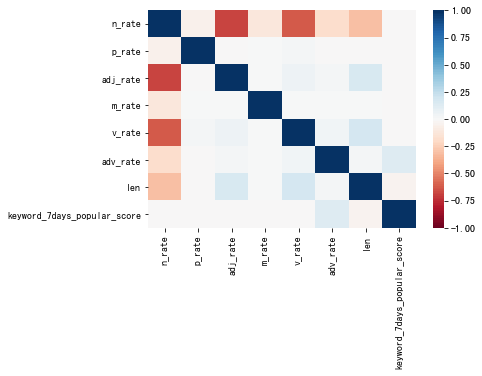

In [128]:
sns.set_context(font_scale=1.5)
sns.heatmap(data_numeric.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128))

In [129]:
data_numeric.corr()
# over 0.60
# n_rate: adj_rate, v_rate

,n_rate,p_rate,adj_rate,m_rate,v_rate,adv_rate,len,keyword_7days_popular_score
n_rate,1.000000,-0.055276,-0.686406,-0.122481,-0.613754,-0.186727,-0.298510,-0.001512
p_rate,-0.055276,1.000000,-0.014185,0.000586,0.020966,-0.004207,-0.008707,-0.001522
adj_rate,-0.686406,-0.014185,1.000000,0.003080,0.054476,0.017295,0.165268,-0.013723
m_rate,-0.122481,0.000586,0.003080,1.000000,0.013698,0.012177,0.010825,-0.001468
v_rate,-0.613754,0.020966,0.054476,0.013698,1.000000,0.035971,0.174335,-0.012184
adv_rate,-0.186727,-0.004207,0.017295,0.012177,0.035971,1.000000,0.027059,0.128518
len,-0.298510,-0.008707,0.165268,0.010825,0.174335,0.027059,1.000000,-0.041474
keyword_7days_popular_score,-0.001512,-0.001522,-0.013723,-0.001468,-0.012184,0.128518,-0.041474,1.000000


In [13]:
data_numeric = data_numeric.drop(columns=['adj_rate', 'v_rate'])

In [14]:
data_cate["cate_tag"] = data_cate["cate_tag"].astype(np.object)

In [15]:
data_cate.dtypes

tag         object
cate_tag    object
dtype: object

In [16]:
data_dummy = pd.get_dummies(data_cate)

In [17]:
data_dummy

,tag_AGRI,tag_ECON,tag_EDUC,tag_ENER,tag_ENVI,tag_GOVE,tag_HEAL,tag_INTR,tag_JUST,tag_REGI,tag_SOCI,tag_TECH,tag_TRAN,cate_tag_0.0,cate_tag_1.0,cate_tag_2.0,cate_tag_3.0,cate_tag_4.0,cate_tag_5.0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69797,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
69798,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
69799,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
69800,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [18]:
data_model = pd.concat([data_numeric, data_dummy], axis=1)

In [19]:
data_model

,n_rate,p_rate,m_rate,adv_rate,len,keyword_7days_popular_score,tag_AGRI,tag_ECON,tag_EDUC,tag_ENER,...,tag_REGI,tag_SOCI,tag_TECH,tag_TRAN,cate_tag_0.0,cate_tag_1.0,cate_tag_2.0,cate_tag_3.0,cate_tag_4.0,cate_tag_5.0
0,0.6667,0.0,0.0,0.0,40,0.000010,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.6000,0.0,0.0,0.0,52,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0000,0.0,0.0,0.0,49,0.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0000,0.0,0.0,0.0,57,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0000,0.0,0.0,0.0,49,0.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69797,1.0000,0.0,0.0,0.0,32,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
69798,1.0000,0.0,0.0,0.0,22,0.000000,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
69799,0.5714,0.0,0.0,0.0,53,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
69800,1.0000,0.0,0.0,0.0,49,0.000000,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### Unbalanced positive and negative samples

In [20]:
X_model = data_model
# data_used['y_tag'] = data_cate["y_tag"].astype(np.object)
y_model = data_used['y_tag']

In [21]:
# 通过过抽样和欠抽样解决样本不均衡
# SMOTE

smo = SMOTE(random_state=0)
X_sampling, y_sampling = smo.fit_resample(X_model, y_model)

In [ ]:
# 通过组合/集成方法解决样本不均衡
# 组合/集成方法指的是在每次生成训练集时使用所有分类中的小样本量，
# 同时从分类中的大样本量中随机抽取数据来与小样本量合并构成训练集，
# 这样反复多次会得到很多训练集和训练模型。
# 最后在应用时，使用组合方法（例如投票、加权投票等）产生分类预测结果。

### train test split

In [55]:
# 保证划分后训练集和测试集的正负样本比和原始数据一致
# stratify = data_y 
# train:valid:test 6:2:2
X_train_all, X_test, y_train_all, y_test = train_test_split(X_sampling, y_sampling, test_size=0.2, random_state=0, stratify=y_sampling)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, test_size=0.25, random_state=0, stratify=y_train_all)

In [126]:
X_train.to_excel('X_train.xlsx')

In [127]:
y_train.to_excel('y_train.xlsx')

In [128]:
X_valid.to_excel('X_valid.xlsx')

In [129]:
y_valid.to_excel('y_valid.xlsx')

In [130]:
X_test.to_excel('X_test.xlsx')

In [131]:
y_test.to_excel('y_test.xlsx')

In [132]:
X_train_all.to_excel('X_train_all.xlsx')

In [133]:
y_train_all.to_excel('y_train_all.xlsx')

In [ ]:
# 逻辑回归
# 决策树
# 神经网络
# k近邻
# SVM

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score, f1_score, accuracy_score, precision_score
from xgboost import XGBClassifier, plot_importance
import lightgbm as lgb

In [3]:
X_train_all = pd.read_excel('X_train_all.xlsx', index_col=0)
y_train_all = pd.read_excel('y_train_all.xlsx', index_col=0)
X_train = pd.read_excel('X_train.xlsx', index_col=0)
y_train = pd.read_excel('y_train.xlsx', index_col=0)
X_valid = pd.read_excel('X_valid.xlsx', index_col=0)
y_valid = pd.read_excel('y_valid.xlsx', index_col=0)
X_test = pd.read_excel('X_test.xlsx', index_col=0)
y_test = pd.read_excel('y_test.xlsx', index_col=0)

### Model construction

#### Logistic Regression

In [65]:
# 调整 C
# C=0.26
# 0.7068470312724162
param_grid = {'C':np.linspace(0.05, 1, 19)}
lr_clf = LogisticRegression(penalty='l1', 
                            solver='liblinear', 
                            C=i, 
                            max_iter=1000)
GS = GridSearchCV(lr_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'C': 0.2611111111111111}
0.7068470312724162


In [74]:
# LR: 0.7066464635757873
LR_clf = LogisticRegression(penalty='l1', solver='liblinear', C=0.26, max_iter=1000)
cross_val_score(LR_clf, X_train_all, y_train_all, scoring='accuracy', cv=10).mean()

0.7066464635757873

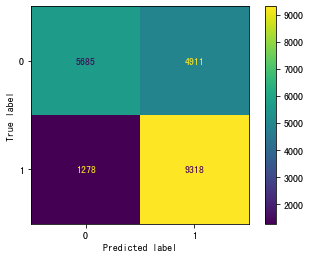

In [79]:
# predict
LR_clf.fit(X_train_all, y_train_all)
y_pred = LR_clf.predict(X_test)
LR_cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(LR_cm).plot()

In [84]:
print('分类准确率为：', accuracy_score(y_test, y_pred))
print('f1值为：', f1_score(y_test, y_pred, average='macro'))
print('cohen_kappa系数为：', cohen_kappa_score(y_test, y_pred))

分类准确率为： 0.7079558323895809
f1值为： 0.699113022319744
cohen_kappa系数为： 0.41591166477916197


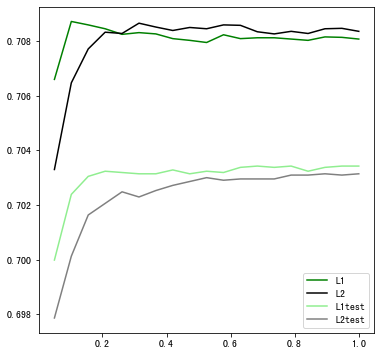

In [163]:
# 确定 C=0.6
# lr1 = []
# lr2 = []
# l1test = []
# l2test = []
# for i in np.linspace(0.05, 1, 19):
#     lr1_clf = LogisticRegression(penalty='l1', solver='liblinear', C=i, max_iter=1000)
#     lr2_clf = LogisticRegression(penalty='l2', solver='liblinear', C=i, max_iter=1000)
    
#     lr1_clf = lr1_clf.fit(X_train, y_train)
#     lr1.append(accuracy_score(lr1_clf.predict(X_train), y_train))
#     l1test.append(accuracy_score(lr1_clf.predict(X_valid), y_valid))
#     lr2_clf = lr2_clf.fit(X_train, y_train)
#     lr2.append(accuracy_score(lr2_clf.predict(X_train), y_train))
#     l2test.append(accuracy_score(lr2_clf.predict(X_valid), y_valid))
# graph = [lr1, lr2, l1test, l2test]
# color = ['green', 'black', 'lightgreen', 'gray']
# label = ['L1', 'L2', 'L1test', 'L2test']
# plt.figure(figsize=(6, 6))
# for i in range(len(graph)):
#     plt.plot(np.linspace(0.05, 1, 19), graph[i], color[i], label=label[i])
# plt.legend(loc=4)
# plt.show()

#### Decision Tree

In [67]:
# 调整 max_depth
# max_depth=30
# 0.7396895956373749
param_grid = {'max_depth':np.arange(1, 1+30, 1)}
tree_clf = tree.DecisionTreeClassifier(criterion='gini', 
                                       random_state=0, 
                                       splitter="random")
GS = GridSearchCV(tree_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 30}
0.7396895956373749


In [69]:
# 调整 min_samples_leaf
# 准确率不变，不设置
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
tree_clf = tree.DecisionTreeClassifier(criterion='gini', 
                                       random_state=0, 
                                       splitter="random",
                                       max_depth=30)
GS = GridSearchCV(tree_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'min_samples_leaf': 1}
0.7396895956373749


In [70]:
# 调整 min_samples_split
# min_samples_split=4
# 0.74053897359777
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
tree_clf = tree.DecisionTreeClassifier(criterion='gini', 
                                       random_state=0, 
                                       splitter="random",
                                       max_depth=30)
GS = GridSearchCV(tree_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'min_samples_split': 4}
0.74053897359777


In [71]:
# 调整 max_features
# 准确率不变，不设置
param_grid = {'max_features':np.arange(5, 26, 1)}
tree_clf = tree.DecisionTreeClassifier(criterion='gini', 
                                       random_state=0, 
                                       splitter="random",
                                       max_depth=30,
                                       min_samples_split=4)
GS = GridSearchCV(tree_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'max_features': 25}
0.74053897359777


In [85]:
# Decision tree: 0.74053897359777
Tree_clf = tree.DecisionTreeClassifier(criterion='gini', 
                                       random_state=0, 
                                       splitter="random",
                                       max_depth=30,
                                       min_samples_split=4)
cross_val_score(Tree_clf, X_train_all, y_train_all, scoring='accuracy', cv=10).mean()

0.74053897359777

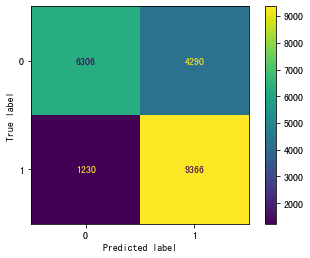

In [86]:
# predict
Tree_clf.fit(X_train_all, y_train_all)
y_pred = Tree_clf.predict(X_test)
Tree_cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(Tree_cm).plot()

In [87]:
print('分类准确率为：', accuracy_score(y_test, y_pred))
print('f1值为：', f1_score(y_test, y_pred, average='macro'))
print('cohen_kappa系数为：', cohen_kappa_score(y_test, y_pred))

分类准确率为： 0.739524348810872
f1值为： 0.7339778782086568
cohen_kappa系数为： 0.47904869762174407


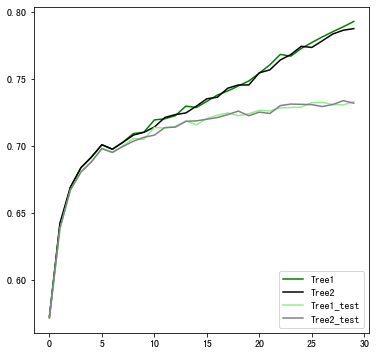

In [173]:
# criterion='gini' max_depth=28
# tree1 = []
# tree2 = []
# tree1_test = [] 
# tree2_test = [] 
# for i in range(30):
#     tree1_clf = tree.DecisionTreeClassifier(max_depth=i+1, criterion='gini', random_state=0, splitter="random")
#     tree2_clf = tree.DecisionTreeClassifier(max_depth=i+1, criterion='entropy', random_state=0, splitter="random")
    
#     tree1_clf = tree1_clf.fit(X_train, y_train) 
#     tree1.append(accuracy_score(tree1_clf.predict(X_train), y_train))
#     tree1_test.append(accuracy_score(tree1_clf.predict(X_valid), y_valid))
#     tree2_clf = tree2_clf.fit(X_train, y_train) 
#     tree2.append(accuracy_score(tree2_clf.predict(X_train), y_train))
#     tree2_test.append(accuracy_score(tree2_clf.predict(X_valid), y_valid))
# graph = [tree1, tree2, tree1_test, tree2_test]
# color = ['green', 'black', 'lightgreen', 'gray']
# label = ['Tree1', 'Tree2', 'Tree1_test', 'Tree2_test']
# plt.figure(figsize=(6, 6))
# for i in range(len(graph)):
#     plt.plot(range(30), graph[i], color[i], label=label[i])
# plt.legend(loc=4)
# plt.show()

# plt.plot(range(1,11),test,color="red",label="max_depth")
# plt.legend() 
# plt.show()

#### Random Forest

In [ ]:
# grid search
# param_grid
# param_grid = {'n_estimators':np.arange(0, 200, 10)}
# param_grid = {'max_depth':np.arange(1, 20, 1)}
# param_grid = {'max_leaf_nodes':np.arange(25, 50, 1)}
# param_grid = {'criterion':['gini', 'entropy']}
# param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
# param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
# param_grid = {'max_features':np.arange(5, 30, 1)}

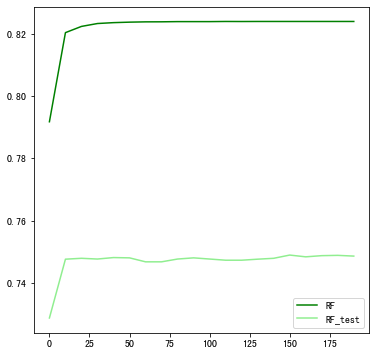

In [35]:
# 调整 n_estimators
# n_estimators=32
# rf = []
# rf_test = []
# for i in range(0, 200, 10):
#     rf_clf = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=0)
#     rf_clf = rf_clf.fit(X_train, y_train)

#     rf.append(accuracy_score(rf_clf.predict(X_train), y_train))
#     rf_test.append(accuracy_score(rf_clf.predict(X_valid), y_valid))
# graph = [rf, rf_test]
# color = ['green', 'lightgreen']
# label = ['RF', 'RF_test']
# plt.figure(figsize=(6, 6))
# for i in range(len(graph)):
#     plt.plot(range(0, 200, 10), graph[i], color[i], label=label[i])
# plt.legend(loc=4)
# plt.show()    
#     score = cross_val_score(rf_clf, X_test, y_test, scoring='accuracy', cv=10).mean()

In [90]:
# 调整 max_depth
# max_depth=30
# 0.754683438733785
param_grid = {'max_depth':np.arange(1, 40, 1)}
rfc = RandomForestClassifier(n_estimators=32, 
                             random_state=0) 
GS = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 30}
0.754683438733785


In [91]:
# 调整 max_features
# max_features=23
# 0.7567714805344812
param_grid = {'max_features':np.arange(5, 26, 1)}
rfc = RandomForestClassifier(n_estimators=32, 
                             max_depth=30,
                             random_state=0) 
GS = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'max_features': 23}
0.7567714805344812


In [93]:
# 调整 min_samples_leaf
# min_samples_leaf=2
# 0.7575618656216753
param_grid = {'min_samples_leaf':np.arange(1, 1+20, 1)}
rfc = RandomForestClassifier(n_estimators=32, 
                             max_depth=30,
                             max_features=23, 
                             random_state=0) 
GS = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'min_samples_leaf': 2}
0.7575618656216753


In [94]:
# 调整 min_samples_split
# 准确率不变，不设置
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=32, 
                             max_depth=30,
                             max_features=23, 
                             min_samples_leaf=2, 
                             random_state=0) 
GS = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'min_samples_split': 2}
0.7575618656216753


In [95]:
# 调整 criterion
# 准确率不变，不设置
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=32, 
                             max_depth=30,
                             max_features=23, 
                             min_samples_leaf=2, 
                             random_state=0) 
GS = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'criterion': 'gini'}
0.7575618656216753


In [96]:
RF_clf = RandomForestClassifier(n_estimators=32, 
                                max_depth=30,
                                max_features=23, 
                                min_samples_leaf=2, 
                                random_state=0) 
cross_val_score(RF_clf, X_train_all, y_train_all, scoring='accuracy', cv=10).mean()

0.7575618656216753

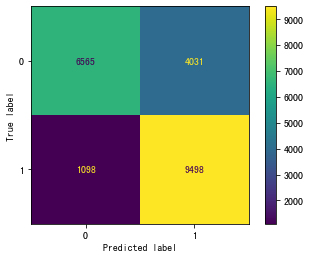

In [97]:
# predict
RF_clf.fit(X_train_all, y_train_all)
y_pred = RF_clf.predict(X_test)
RF_cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(RF_cm).plot()

In [98]:
print('分类准确率为：', accuracy_score(y_test, y_pred))
print('f1值为：', f1_score(y_test, y_pred, average='macro'))
print('cohen_kappa系数为：', cohen_kappa_score(y_test, y_pred))

分类准确率为： 0.7579747074367686
f1值为： 0.7532481975671306
cohen_kappa系数为： 0.5159494148735372


#### XGBoost

In [123]:
start_time = time.time()
xgb_clf = XGBClassifier(learning_rate=0.1,
                        n_estimators=300,
                        max_depth=5,
                        min_child_weight=1,
                        gamma=0,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        reg_alpha=0, 
                        reg_lambda=1, 
                        seed=1997)
print(time.time()-start_time)
print(cross_val_score(xgb_clf, X_train_all, y_train_all, scoring='accuracy', cv=10).mean())

0.0019261837005615234
0.7461896299027048


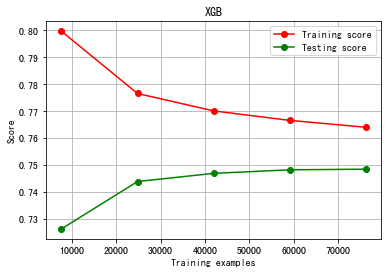

In [143]:
def plot_learning_curve(estimator, title, X, y, 
                        ax=None, 
                        ylim=None, 
                        cv=None, 
                        n_jobs=None):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            shuffle=True, 
                                                            cv=cv, 
                                                            random_state=0, 
                                                            n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', 
            color="r", label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', 
            color="g", label="Testing score")
    ax.legend(loc="best")
    return ax


cv = KFold(n_splits=10, shuffle=True, random_state=0)

plot_learning_curve(XGBClassifier(n_estimators=100, random_state=0), "XGB", 
                    X_train_all, y_train_all, ax=None, cv=cv)
# 注意这里的test_score是交叉验证里分出来的测试集的分数,而非验证集的分数
plt.show()

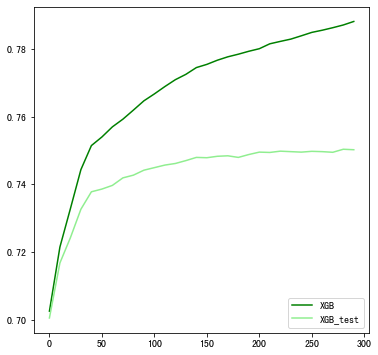

In [148]:
# 调整 n_estimators
# n_estimators=200
xgb = []
xgb_test = []
for i in range(0, 300, 10):
    xgb_clf = XGBClassifier(n_estimators=i+1, n_jobs=-1, random_state=0)
    xgb_clf = xgb_clf.fit(X_train, y_train)

    xgb.append(accuracy_score(xgb_clf.predict(X_train), y_train))
    xgb_test.append(accuracy_score(xgb_clf.predict(X_valid), y_valid))
graph = [xgb, xgb_test]
color = ['green', 'lightgreen']
label = ['XGB', 'XGB_test']
plt.figure(figsize=(6, 6))
for i in range(len(graph)):
    plt.plot(range(0, 300, 10), graph[i], color[i], label=label[i])
plt.legend(loc=4)
plt.show()    

In [149]:
xgb_clf = XGBClassifier(n_estimators=200, random_state=0)
cross_val_score(xgb_clf, X_train_all, y_train_all, scoring='accuracy', cv=10).mean()

0.7542233383026876

In [ ]:
# 调整 n_estimators
# n_estimators=200
# 0.7542233383026876
param_grid = {'n_estimators':[100, 125, 150, 175, 200, 225, 250, 275, 300]}
# xgb_clf = XGBClassifier(learning_rate=0.1,
#                         max_depth=5,
#                         min_child_weight=1,
#                         gamma=0,
#                         subsample=0.8,
#                         colsample_bytree=0.8,
#                         reg_alpha=0, 
#                         reg_lambda=1, 
#                         seed=1997)
GS = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

In [150]:
# 调整 subsample
# subsample=0.7
# 0.7557569150135756
param_grid = {'subsample': [0.6, 0.7, 0.8, 0.9]}
xgb_clf = XGBClassifier(n_estimators=200, random_state=0)
GS = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'subsample': 0.7}
0.7557569150135756


In [151]:
# 调整 gamma
# gamma=0.6
# 0.7564293143543674
param_grid = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
xgb_clf = XGBClassifier(n_estimators=200, 
                        subsample=0.7,
                        random_state=0)
GS = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'gamma': 0.6}
0.7564293143543674


In [152]:
# 调整 max_depth
# max_depth=9
# 0.7606526610076634
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}
xgb_clf = XGBClassifier(n_estimators=200, 
                        subsample=0.7, 
                        gamma=0.6, 
                        random_state=0)
GS = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 9}
0.7606526610076634


In [153]:
XGB_clf = XGBClassifier(n_estimators=200, 
                        subsample=0.7, 
                        gamma=0.6, 
                        max_depth=9, 
                        random_state=0)
cross_val_score(XGB_clf, X_train_all, y_train_all, scoring='accuracy', cv=10).mean()

0.7606526610076634

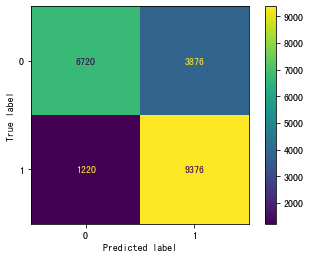

In [154]:
# predict
XGB_clf.fit(X_train_all, y_train_all)
y_pred = XGB_clf.predict(X_test)
XGB_cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(XGB_cm).plot()

In [155]:
print('分类准确率为：', accuracy_score(y_test, y_pred))
print('f1值为：', f1_score(y_test, y_pred, average='macro'))
print('cohen_kappa系数为：', cohen_kappa_score(y_test, y_pred))

分类准确率为： 0.759531898829747
f1值为： 0.7556944231897689
cohen_kappa系数为： 0.5190637976594942


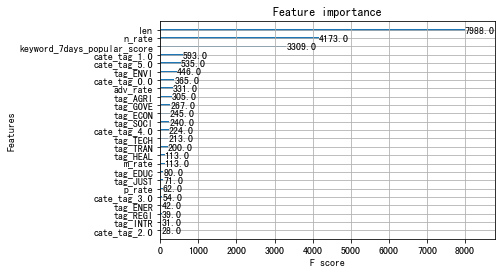

In [158]:
# plot feature importance
plot_importance(XGB_clf)
plt.show()

#### LightGBM

In [11]:
start_time = time.time()
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', 
                             objective ='binary',
                             n_estimators=999, 
                             
                             learning_rate=0.1,
                             num_leaves=30, 
                             max_depth=6,
                             
                             subsample=0.8,
                             colsample_bytree=0.8, 
                             random_state=0)
print(time.time()-start_time)
print(cross_val_score(lgb_clf, X_train_all, y_train_all, scoring='accuracy', cv=10).mean())

0.0021839141845703125
0.752996483614464


In [5]:
params = {'boosting_type': 'gbdt', 
          'objective': 'binary', 

          'learning_rate': 0.1, 
          'num_leaves': 30, 
          'max_depth': 6,

          'subsample': 0.8, 
          'colsample_bytree': 0.8, 
          'random_state': 0}

In [10]:
# 调整 n_estimators
# n_estimators=999
# auc: 0.8302520266055593
data_train = lgb.Dataset(X_train_all, y_train_all, silent=True)
cv_results = lgb.cv(
    params, data_train, num_boost_round=1000, nfold=10, stratified=False, shuffle=True, metrics='auc',
    early_stopping_rounds=100, verbose_eval=50, show_stdv=True, seed=0)

print('best n_estimators:', len(cv_results['auc-mean']))
print('best cv score:', cv_results['auc-mean'][-1])

[LightGBM] [Info] Number of positive: 38210, number of negative: 38074
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 76284, number of used features: 25
[LightGBM] [Info] Number of positive: 38141, number of negative: 38143
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 76284, number of used features: 25
[LightGBM] [Info] Number of positive: 38121, number of negative: 38163
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead o

In [12]:
# 调整 max_depth
# max_depth=10
# 0.7569484452364038
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', 
                             objective ='binary',
                             n_estimators=999, 
                             
                             learning_rate=0.1,
                             num_leaves=30, 
                             
                             subsample=0.8,
                             colsample_bytree=0.8, 
                             random_state=0)

GS = GridSearchCV(lgb_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 10}
0.7569484452364038


In [13]:
# 调整 num_leaves
# num_leaves=140
# 0.7605583297513863
param_grid = {'num_leaves':range(50, 170, 30)}
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', 
                             objective ='binary',
                             n_estimators=999, 
                             
                             learning_rate=0.1,
                             max_depth=10, 
                             
                             subsample=0.8,
                             colsample_bytree=0.8, 
                             random_state=0)

GS = GridSearchCV(lgb_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'num_leaves': 140}
0.7605583297513863


In [14]:
# 调整 min_child_samples
# min_child_samples=20
# 0.7605583297513863
param_grid = {'min_child_samples': [18, 19, 20, 21, 22]}
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', 
                             objective ='binary',
                             n_estimators=999, 
                             
                             learning_rate=0.1,
                             max_depth=10, 
                             num_leaves=140, 
                             
                             subsample=0.8,
                             colsample_bytree=0.8, 
                             random_state=0)

GS = GridSearchCV(lgb_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'min_child_samples': 20}
0.7605583297513863


In [15]:
# 调整 subsample
# subsample=0.6
# 0.7605583297513863
param_grid = {'subsample': [0.6, 0.7, 0.8, 0.9]}
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', 
                             objective ='binary',
                             n_estimators=999, 
                             
                             learning_rate=0.1,
                             max_depth=10, 
                             num_leaves=140, 
                             
                             min_child_samples=20, 
                             colsample_bytree=0.8, 
                             random_state=0)

GS = GridSearchCV(lgb_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'subsample': 0.6}
0.7605583297513863


In [16]:
# 调整 colsample_bytree
# colsample_bytree=0.9
# 0.7610655749341012
param_grid = {'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', 
                             objective ='binary',
                             n_estimators=999, 
                             
                             learning_rate=0.1,
                             max_depth=10, 
                             num_leaves=140, 
                             
                             min_child_samples=20, 
                             subsample=0.6, 
                             random_state=0)

GS = GridSearchCV(lgb_clf, param_grid, scoring='accuracy', cv=10) 
GS.fit(X_train_all, y_train_all)
print(GS.best_params_)
print(GS.best_score_)

{'colsample_bytree': 0.9}
0.7610655749341012


In [17]:
LGB_clf = lgb.LGBMClassifier(boosting_type='gbdt', 
                             objective ='binary',
                             n_estimators=999, 
                             
                             learning_rate=0.1,
                             max_depth=10, 
                             num_leaves=140, 
                             
                             min_child_samples=20, 
                             subsample=0.6, 
                             colsample_bytree=0.9, 
                             random_state=0)
cross_val_score(LGB_clf, X_train_all, y_train_all, scoring='accuracy', cv=10).mean()

0.7610655749341012

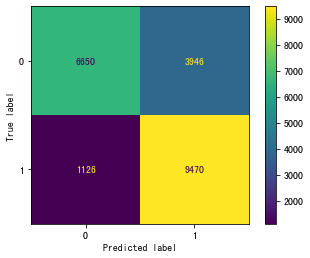

In [18]:
# predict
LGB_clf.fit(X_train_all, y_train_all)
y_pred = LGB_clf.predict(X_test)
LGB_cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(LGB_cm).plot()

In [19]:
print('分类准确率为：', accuracy_score(y_test, y_pred))
print('f1值为：', f1_score(y_test, y_pred, average='macro'))
print('cohen_kappa系数为：', cohen_kappa_score(y_test, y_pred))

分类准确率为： 0.7606644016610041
f1值为： 0.7563499983080526
cohen_kappa系数为： 0.5213288033220083
